# Multiple Linear Regression

The goal is to 
 - perform a Multiple Linear Regression to expand my professional portfolio
 - and use it as a stepping stone from the Simple Linear Regression to the General Linearized Models.

## Introduction:

In the CC_DS21_Honey_Production repository I performed the simplest type of regression model, simple linear regression, relating the dependent variable of "mean-total-production of honey across all states" to the independent variable of "year". In the following model, we will allow more than one independent variable. I did generate my own data for this exercise, as it allows for easy validation of the model and the validation is what in a lot of cases limits me to well explored datasets in the first place, the linearity of the model on top of that to data that lacks meaning or is highly correlated.

### The data:
 - lin.csv, generated by custon_df_linear.py
 - has 8 variables
 - Y is dependent on X_1,X_2,C_1,C_2 and I_V
 - C_1 and C_2 are highly correlated (based on) X_1 and X_2
 - I_V was sorted in ascending order, prior to generating Y, resulting in it having residuals with increasing variance, residuals being based on percentage of original value
 - D_1 and D_2 have no intentional relation to Y
 - all values have x = x * (1 + 0.01 * random.randint(-10,10)) applied to them after generation, to simulate residuals

The goal was to create a dataset, that can be used for "calibration", showing any obvious mistakes, or topics not fully understood. Especially in regarding to the tests for model assumptions. As preparation for regression on a real world dataset.

### The model:

The model is a first-order multiple regression model, meaning, there is no cross-product terms or terms in power of the independent variables.

y = $\beta_0$ + $\beta_1 x_1$ + . . . + $\beta_k x_k$ + $\epsilon$, 
    
with k + 1 parameters $\beta_0$, $\beta_1$, . . . , $\beta_k$, the response variable y and the k quantitative explanatory variables $x_1$, $x_2$, ... , $x_k$. $\beta_0$ is the y-intercept.

For sample size n the resulting linear model is:

$y = X\beta + \epsilon$

$$
\begin{pmatrix}
  y_{1} \\
  y_{2} \\
  \vdots  \\
  y_{n}
 \end{pmatrix} 
 =
 \begin{pmatrix}
  1 & x_{1,1} & x_{1,2} & \cdots & x_{1,k} \\
  1 & x_{2,1} & x_{2,2} & \cdots & x_{2,k} \\
  \vdots & \vdots  & \vdots  & \ddots & \vdots  \\
  1 & x_{n,1} & x_{n,2} & \cdots & x_{n,k} 
 \end{pmatrix}
 \times
 \begin{pmatrix}
  \beta_{0} \\
  \beta_{1} \\
  \vdots  \\
  \beta_{k}
 \end{pmatrix}
+
\begin{pmatrix}
  \epsilon_{1} \\
  \epsilon_{2} \\
  \vdots  \\
  \epsilon_{k}
 \end{pmatrix}
$$

The sum of the residuals is:

$Q = \epsilon^T\epsilon = \displaystyle\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_1 - . . . - \beta_k x_i)^2$

For linear models the approximation for the Least Squares Estimator $\hat{\beta}$ is:

$\hat{\beta} = (X^T X)^{-1}X^Ty$

The most common measure of the quality of the model is the Coefficient of Determination ($R^2$):
The proportion of the variation in the dependent variable(y) that is predictable from the independent variables(x). (empirical variance = $s^2$, i-th observation out of n, $\bar{y}$ = mean y)

$\hat\epsilon_i = y_i - \hat{y}_i$

$R^2 = 1 - \frac{s^2(\hat{\epsilon})}{s^2(y)} = \frac{\displaystyle\sum_{i=1}^n \hat{\epsilon}_i^2}{\displaystyle\sum_{i=1}^n (y_i - \bar{y})^2}$

Adjusted $R^2$ which corrects for additional independent variables is defined as:

$\bar{R^2} = 1 - \frac{n - 1}{n - k - 1} (1 - R^2)$

#### The assumptions for multiple regression are:

 1. The mathematical form of the relation is correct, so E($\epsilon_i$) = 0 for all i.
 2. Var ($\epsilon_i$) = $\sigma_\epsilon^2$ for all i.
 3. The $\epsilon_i$ are independent.
 4. $\epsilon_i$ is normally disributed.
 


In [1]:
# import section ------------------------------------------------------------------------------------------------------------- #

# relational database and mathematics related libraries ---------------------------------------------------------------------- #
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats, special

# specific functions and models ---------------------------------------------------------------------------------------------- #
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Testing Model assumptions -------------------------------------------------------------------------------------------------- #
# Tests for heteroscedasticity ----------------------------------------------------------------------------------------------- #
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, het_goldfeldquandt
# Tests for normality -------------------------------------------------------------------------------------------------------- #
from statsmodels.stats.diagnostic import normal_ad, kstest_normal
from statsmodels.stats.stattools import jarque_bera, omni_normtest
# Tests for constant error variance ------------------------------------------------------------------------------------------ #
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
# Tests for autocorrelation -------------------------------------------------------------------------------------------------- #
from statsmodels.stats.stattools import durbin_watson


# libraries for visualization ------------------------------------------------------------------------------------------------ #
import seaborn as sns
import matplotlib.pyplot as plt

# load the data and save it into a dataframe --------------------------------------------------------------------------------- #
all_data_df = pd.read_csv("lin.csv")

# intial print to get an overview over the data and it's usability ----------------------------------------------------------- #
print(all_data_df.head())
#print(all_data_df.info())
#print(all_data_df.I_V.unique())

        X_1       X_2       D_1       D_2          C_1          C_2       I_V  \
0 -0.437668  0.643390  1.170696  0.407076 -2650.437668  2550.669650 -3.445651   
1  0.575635  1.020720  0.076582  0.812595 -2374.430361  2326.009862 -2.846992   
2  0.615925  0.708164 -0.805364 -0.167512 -2599.296086  2325.621314 -2.724445   
3 -0.705776 -0.075444 -0.580468  0.052559 -2325.663002  2624.922337 -2.941616   
4  0.057245  0.427900 -0.226747 -0.530859 -2624.942755  2725.452826 -2.497527   

          Y  
0 -0.576478  
1  0.077075  
2 -0.044579  
3 -0.847291  
4 -0.344569  


#### Correlation Heatmap

Correlation measures the strength of the linear relation between x and y. The stronger the correlation, the better x predicts y.
Given n pairs of observations ($x_i,y_i$), we compute the sample correlation r as:

$r_{xy} = \frac{\sum{(x_i-\bar{x})(y_i-\bar{y})}}{\sqrt{S_{xx} S_{yy}}} = \frac{S_{xy}}{\sqrt{S_{xx} S_{yy}}}$

 - $S_{xy} = \displaystyle\sum_{i}(x_i - \bar{x}) (y_i - \bar{y})$
 - $S_{xx} = \displaystyle\sum_{i}(x_i - \bar{x})^2$
 - $S_{yy} = \displaystyle\sum_{i}(y_i - \bar{y})^2 = SS(Total)$
 - SS = SumSquaredresiduals (prediction errors)
 - $S_{xy}$ = Sum(x-deviations * y-deviations)
 - $\bar{x}$ = mean x
 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

<Figure size 640x480 with 0 Axes>

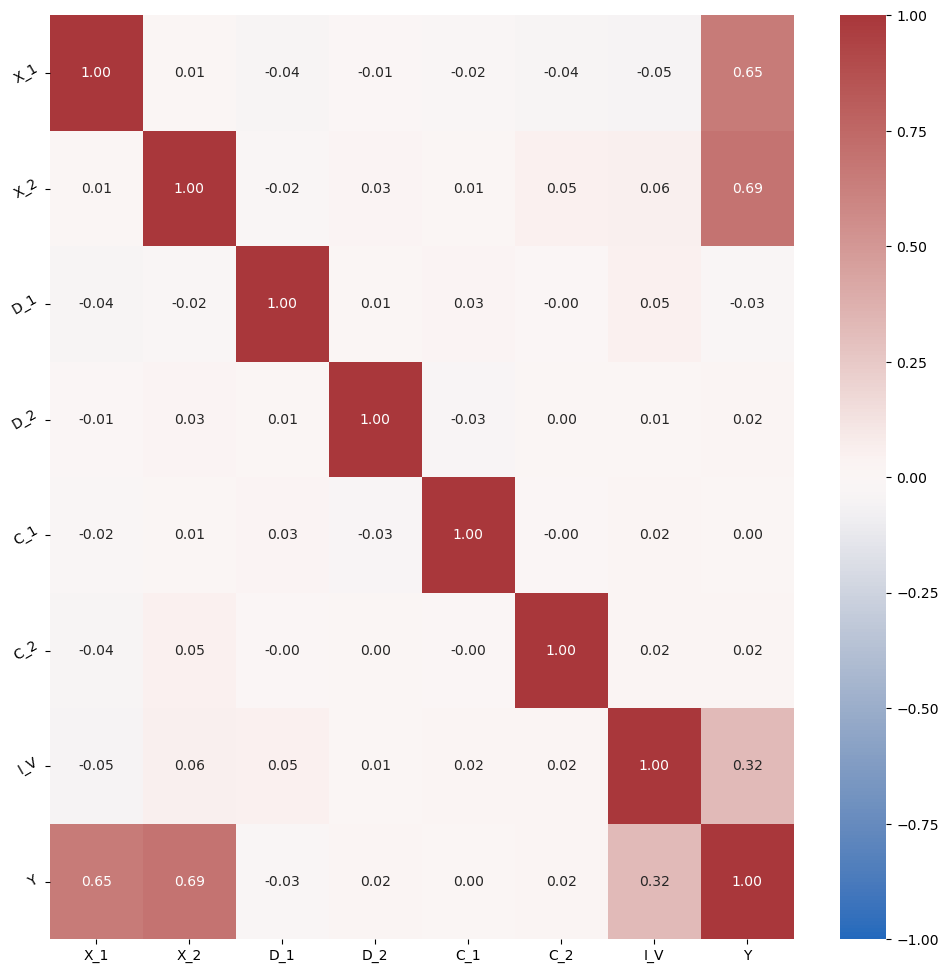

In [2]:
plt.clf()
# correlation matrix --------------------------------------------------------------------------------------------------------- #
corr = all_data_df.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr, vmin=-1, vmax=1, xticklabels=corr.columns, yticklabels=corr.columns, cmap="vlag", annot=True, fmt=".2f")
plt.yticks(rotation=30)
plt.show()

<Figure size 640x480 with 0 Axes>

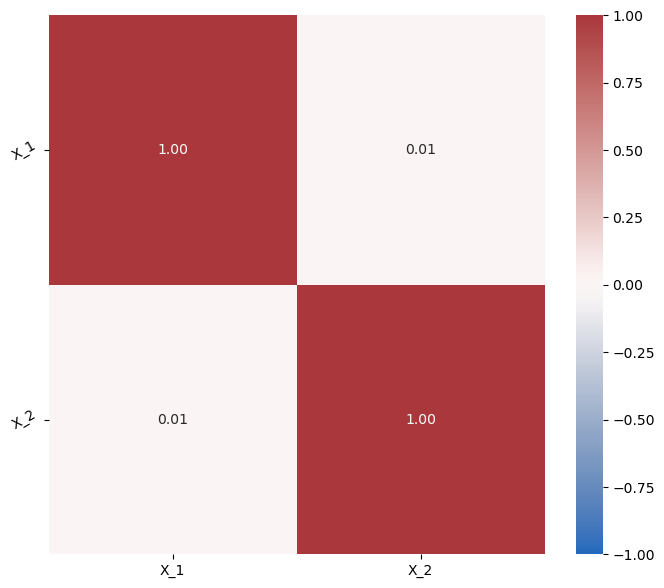

In [3]:
# predefined significance level predefined for all statistical tests --------------------------------------------------------- #
alpha = 0.05

# removing explaining variables, which are highly correlated with other explaining variables --------------------------------- #
# or which do not add any or only very little explainatory value ------------------------------------------------------------- #
predicted_variable = ["Y"]

predicting_variables = ["X_1", "X_2"]

columns_to_drop = list(all_data_df.columns.values)

for var in predicting_variables:
    columns_to_drop.remove(var)

all_data_Y_dropped = all_data_df.drop(columns=predicted_variable)

model_df = all_data_df.drop(columns=columns_to_drop)

# correlation matrix --------------------------------------------------------------------------------------------------------- #
model_corr = model_df.corr()

plt.clf()
plt.figure(figsize=(8,7))
sns.heatmap(model_corr, vmin=-1, vmax=1, xticklabels=model_corr.columns, yticklabels=model_corr.columns, cmap="vlag", annot=True, fmt=".2f")
plt.yticks(rotation=30)
plt.show()

#### Matrix of Scatter Plots

This pandas function allows to plot the values in each column against the values in the other columns. It helps with visioally identifying correlation.

 - correlation = -1 => dots arranged along a line, y ~ -x
 - correlation = -1 => dots arranged as a circular cloud, increasing density towards the center
 - correlation = 1 => dots arranged along a line, y ~ x

https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html

<Figure size 640x480 with 0 Axes>

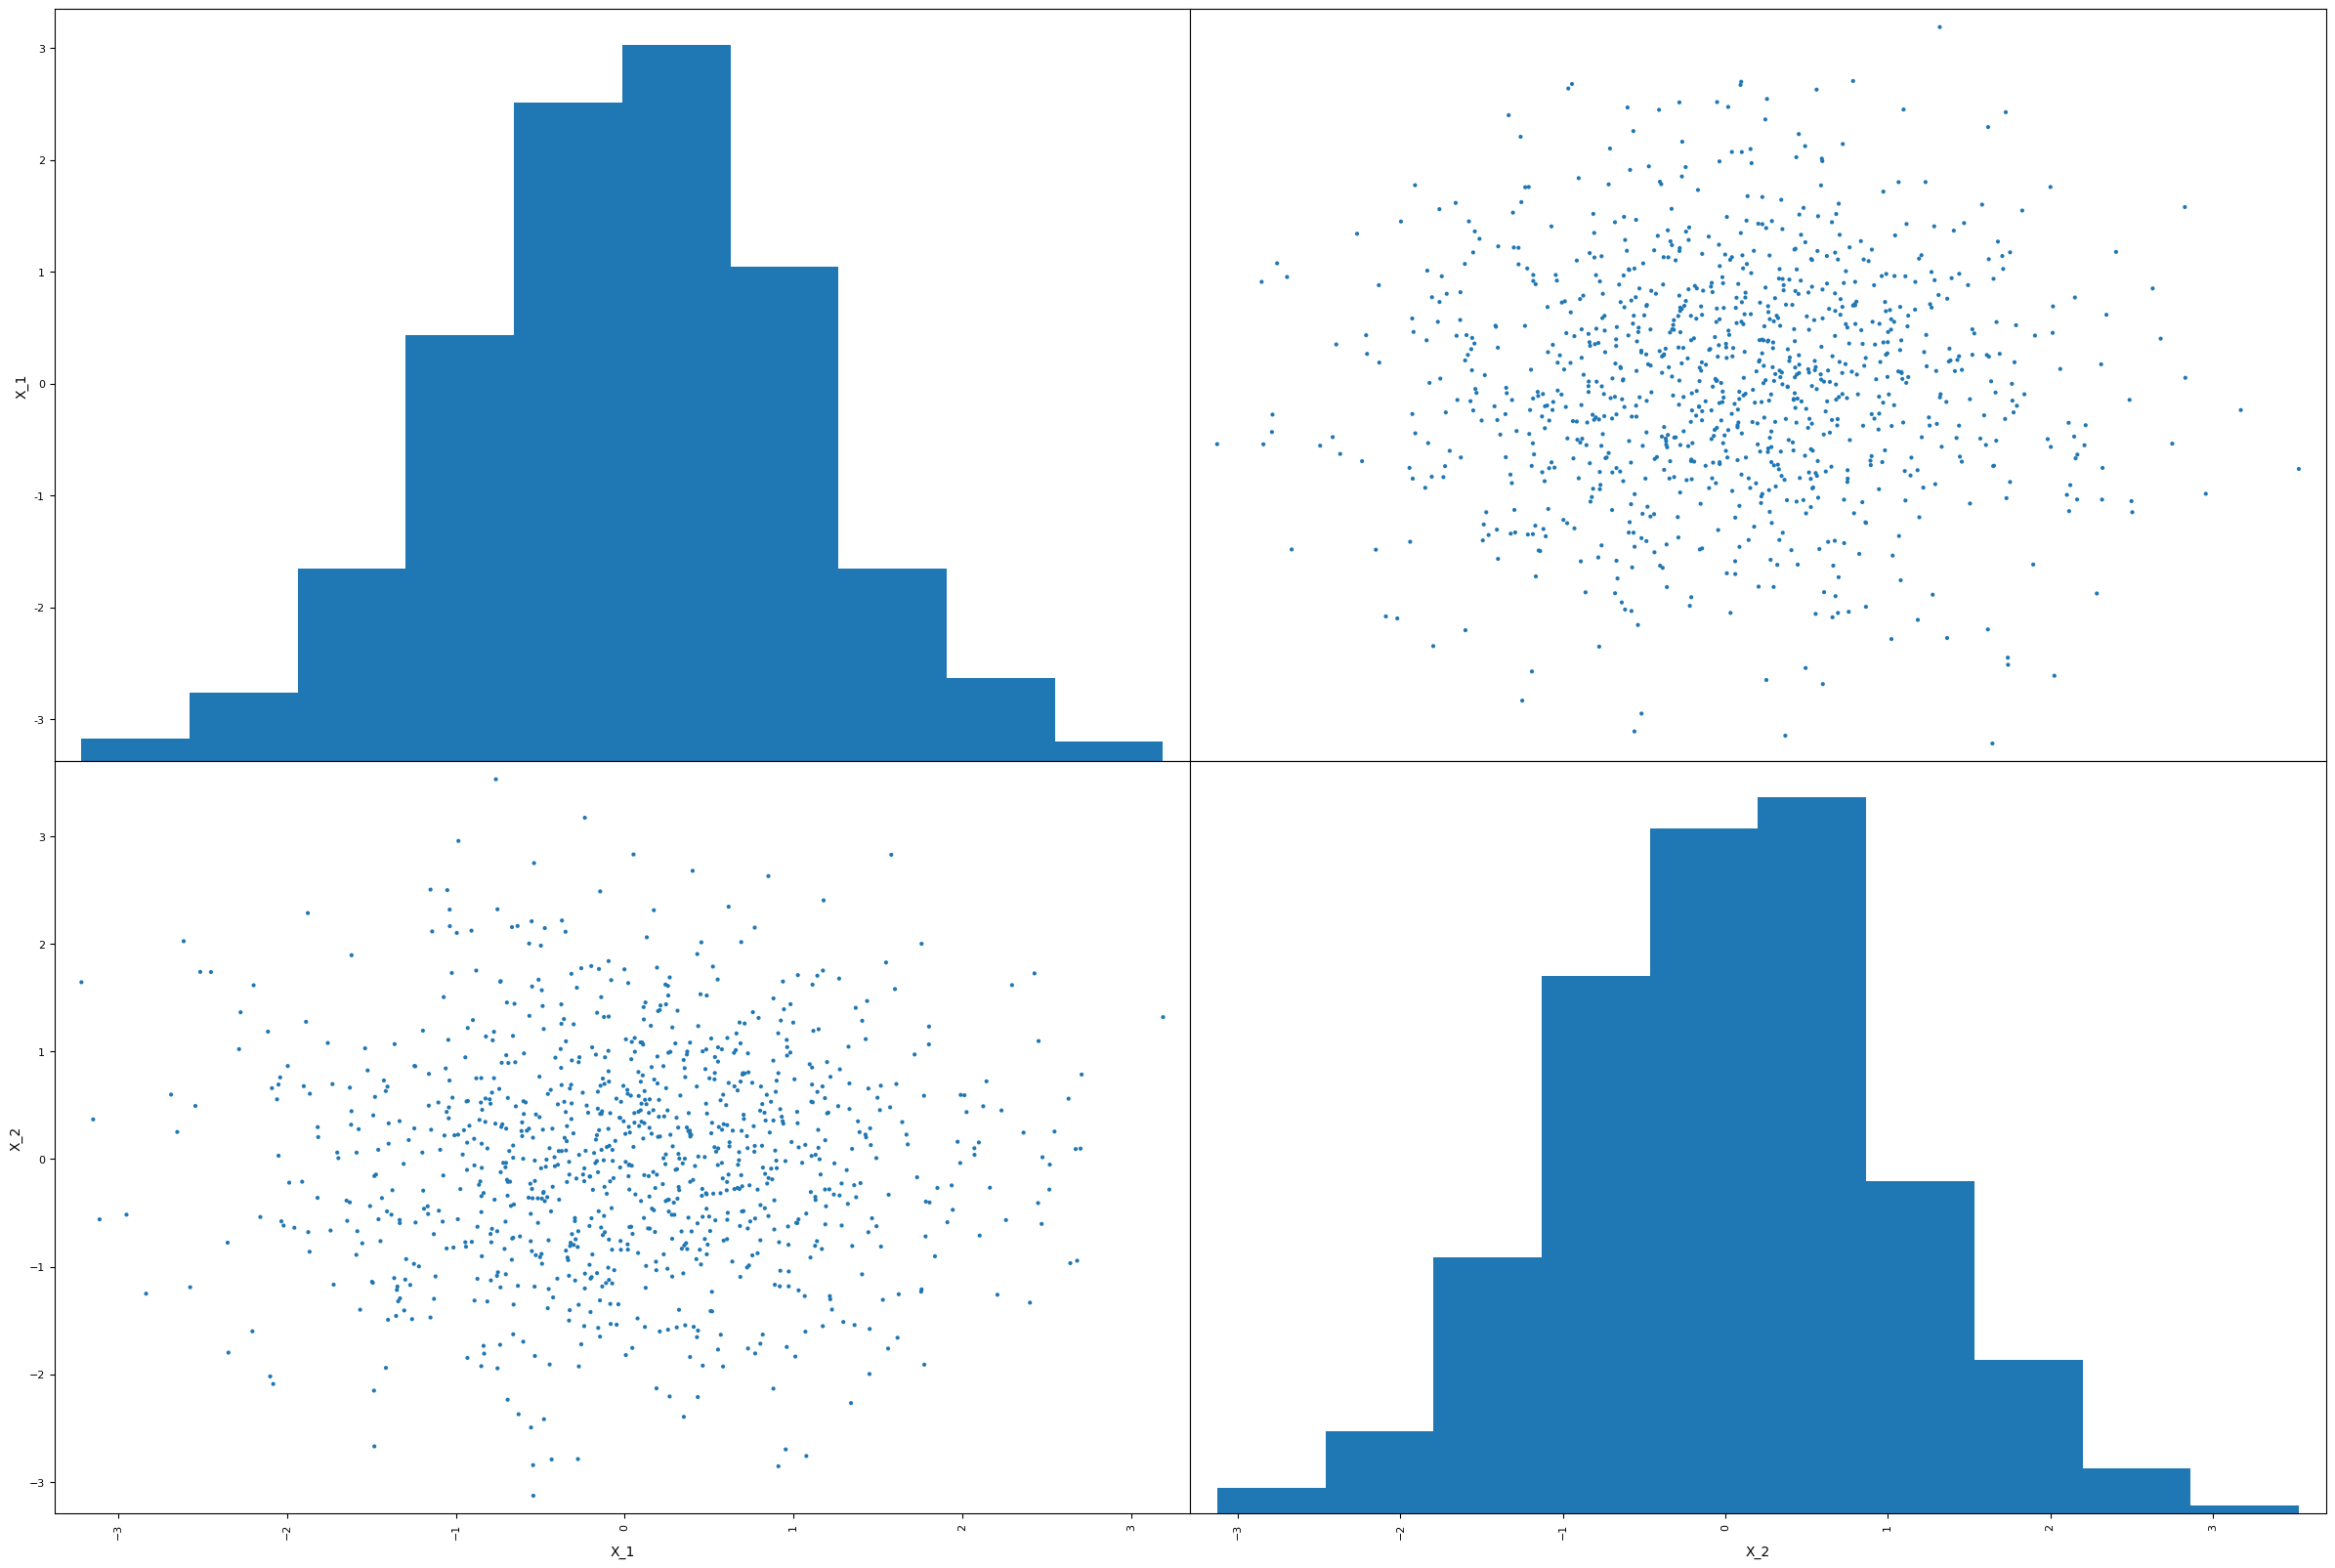

In [4]:
plt.clf()
# define the plot
pd.plotting.scatter_matrix(model_df, alpha = 1, figsize = (30, 20), diagonal = "hist")

# show the plot
plt.show()

#### The Variance Inflation Factor (VIF):

Estimated standard error of $\hat{\beta_j}$ in a multiple regression:

$ s_{\hat{\beta_j}} = s_\epsilon \sqrt{\frac{1}{\sum{(x_{ij} - \bar{x_j})^2 (1 - R^2_j)}}}$

 - $\hat{\beta_j}$ = estimated regression parameters
 - j-th partial slope
 - i-th level of the independent variable
 - $\bar{x_j}$ = mean $x_j$

The VIF measures how much the variance (square of the standard error) of a coefficient is increased because of collinearity.

$VIF_j = \frac{1}{1-R_j^2}$

, $R_j^2$ being the coefficient of determination from the regression of $x_j$ on the remaining k - 1 explanatory variables ($R_j^2$ of the model without $x_j$).


In [5]:
# Variance Inflation Factor, before and after dropping independent variables ------------------------------------------------- #

# dataframes of explaining variables (x), having removed the explained variable (y) ------------------------------------------ #
X_1 = all_data_Y_dropped

X_2 = model_df[predicting_variables]

Y = all_data_df[predicted_variable]
  
# VIF dataframe -------------------------------------------------------------------------------------------------------------- #
vif_data_1 = pd.DataFrame()
vif_data_1["feature"] = X_1.columns

vif_data_2 = pd.DataFrame()
vif_data_2["feature"] = X_2.columns
  
# calculating VIF for each feature ------------------------------------------------------------------------------------------- #
vif_data_1["VIF"] = [variance_inflation_factor(X_1.values, i) for i in range(len(X_1.columns))]

vif_data_2["VIF"] = [variance_inflation_factor(X_2.values, i) for i in range(len(X_2.columns))]

print("VIF=1: vars not correlated, 1<VIF<=5: vars moderatly correlated, 5<VIF<=10: vars highly correlated, VIF>10: abandon all hope")
print("")
print("Before dropping explaining variables:")
print(vif_data_1)
print("")
print("After dropping explaining variables:")
print(vif_data_2)

VIF=1: vars not correlated, 1<VIF<=5: vars moderatly correlated, 5<VIF<=10: vars highly correlated, VIF>10: abandon all hope

Before dropping explaining variables:
  feature         VIF
0     X_1    1.007615
1     X_2    1.007704
2     D_1    1.006536
3     D_2    1.001769
4     C_1  141.461733
5     C_2  141.436004
6     I_V    1.009281

After dropping explaining variables:
  feature       VIF
0     X_1  1.000215
1     X_2  1.000215


#### Checking for Outliers

The following descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, I included the marks for 3 times the standard deviation, to make it easy to spot if there are any outliers.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [6]:
# get describtion of datadistribution ---------------------------------------------------------------------------------------- #
descr_df = model_df.describe()

# add 3-times standard deviation metric -------------------------------------------------------------------------------------- #
descr_df.loc["+ 3 * std"] = descr_df.loc["mean"] + (descr_df.loc["std"] * 3)
descr_df.loc["- 3 * std"] = descr_df.loc["mean"] - (descr_df.loc["std"] * 3)

descr_df

,X_1,X_2
count,1000.000000,1000.000000
mean,0.032629,0.023949
std,1.016520,1.022481
min,-3.216528,-3.128174
25%,-0.636615,-0.649018
50%,0.043675,0.041318
75%,0.701193,0.675098
max,3.187863,3.529977
+ 3 * std,3.082190,3.091394
- 3 * std,-3.016931,-3.043495


In [7]:
# splitting the dataframe into dependent and independent variables ----------------------------------------------------------- #

X = X_2
Y = Y

# split the data into train and test groups ---------------------------------------------------------------------------------- #
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create linear_regression_model_object -------------------------------------------------------------------------------------- #
regression_model = LinearRegression()

# fit the model to the data -------------------------------------------------------------------------------------------------- #
regression_model.fit(X_train, y_train)

LinearRegression()

In [8]:
# intercept and coefficients of the model ------------------------------------------------------------------------------------ #

intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("# Intercept " + "-"*113 + " #")

print("The intercept for the model is {:.4}".format(intercept))
print("")
print("# Coefficients " + "-"*110 + " #")

for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.4}".format(coef[0],coef[1]))

print("")
print("# R² of the model " + "-"*107 + " #")
print(regression_model.score(X, Y))

# Intercept ----------------------------------------------------------------------------------------------------------------- #
The intercept for the model is 0.0004421

# Coefficients -------------------------------------------------------------------------------------------------------------- #
The Coefficient for X_1 is 0.387
The Coefficient for X_2 is 0.4072

# R² of the model ----------------------------------------------------------------------------------------------------------- #
0.8909261969770168


In [9]:
# add constant (1.0) to X ---------------------------------------------------------------------------------------------------- #
Xc = sm.add_constant(X_train)

# creating the model object -------------------------------------------------------------------------------------------------- #
model = sm.OLS(y_train, Xc)

# fitting the data to the model (assigned in prev. step, est = RegressionResults) -------------------------------------------- #
est = model.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     3329.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:38:39   Log-Likelihood:                 146.62
No. Observations:                 800   AIC:                            -287.2
Df Residuals:                     797   BIC:                            -273.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.007      0.062      0.9

In [10]:
# "manual" calculation of coefficient matrix, as proof of method ------------------------------------------------------------- #

# beta_estimator = (X^T X)^{-1} X^T y

y_estimator = np.array(all_data_df[predicted_variable[0]])
X_const_estimator = np.array([[1] for x in range(1000)])
X_var_estimator = np.array(all_data_df[predicting_variables])
X_estimator = np.concatenate((X_const_estimator, X_var_estimator), axis=1)
X_T_estimator = np.transpose(X_estimator)
# matrix multiplikation operator in numpy: @

#beta_estimator = np.linalg.inv(X_T_estimator @ X_estimator) @ X_T_estimator @ y_estimator
beta_estimator = np.linalg.pinv(X_estimator) @ y_estimator

beta_estimator_4dec = np.around(beta_estimator,decimals=4)

print("# Coefficients calculated using matrix operations" + "-"*(122 - len("Coefficients calculated using matrix operations")) + " #")
print("Intercept: " + str(beta_estimator_4dec[0]))
print("beta_0: " + str(beta_estimator_4dec[1]))

for i in range(len(beta_estimator_4dec)):
    if i <= 1:
        pass
    else:
        print("beta_" +str(i-1)+ ": " + str(beta_estimator_4dec[i]))


# Coefficients calculated using matrix operations--------------------------------------------------------------------------- #
Intercept: -0.0013
beta_0: 0.3881
beta_1: 0.4077


#### Scatterplot with fitted Line Plot:

Gives you a rough idea of the relationship between $x_k$ and y, if you need to transform $x_k$ and also allows to make conclusions in regards to correlation. (Technically same as Matrix of Scatterplots, but in regards to $x_i$ relationship to y.)
A lowess (locally weighted linear regression) can be used instead of a linear regression fit line, which in some cases is better suited to identify the $x_i$, y relationship.

https://seaborn.pydata.org/generated/seaborn.regplot.html

<Figure size 640x480 with 0 Axes>

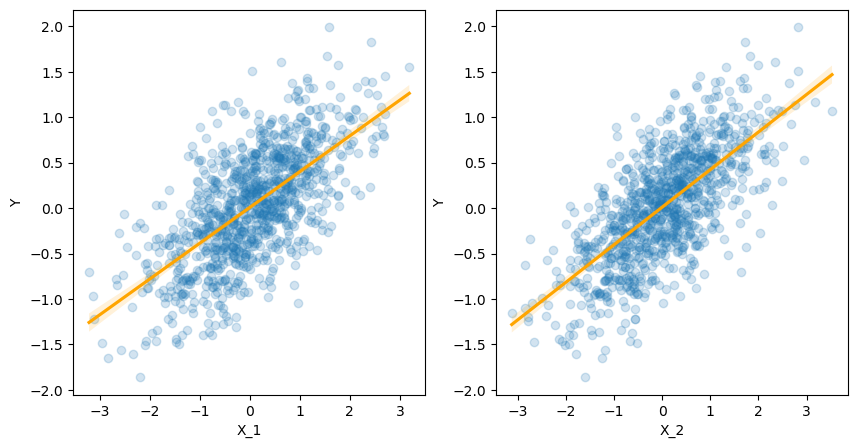

In [11]:
# plotting the data in a scatterplot with a fitted line plot ----------------------------------------------------------------- #
plt.clf()

n_X = len(model_df.columns)

fig = plt.figure(figsize=(5 * n_X ,5))

for i in range(1, n_X+1):
    ax = fig.add_subplot(1, n_X, i)
    sns.regplot(x=model_df[predicting_variables[i-1]], y=Y, line_kws={"color":"orange"}, scatter_kws={"alpha":0.2})

plt.show()

In [12]:
mean, std = stats.norm.fit(est.resid)

print("")
print("Mean of the residuals:")
print(mean)
print("")
print("Standard Deviation:")
print(std)


Mean of the residuals:
1.1157741397482822e-16

Standard Deviation:
0.2014492264445646


#### Distribution of Residuals:

Distribution of residuals is most commanly visualized in two different ways, not being a substitute for hypothesis testing, allows for quick identification of what might be the issue, in case the residuals are not normally distributed.

They also can be more reliable from a practical point of view, when dealing with large sample sizes:
"However, they have their limitations because with large sample sizes it is very easy to get significant 
results from small deviations from normality, and so a significant test doesn’t necessarily tell us 
whether the deviation from normality is enough to bias any statistical procedures that we apply 
to the data." - Discovering Statistics using SPSS, p144, Andy Field, 2009, Third Edition
(One of the sources I found on the issue, I have not, but will look into the math and wether or not this is an issue)

https://seaborn.pydata.org/generated/seaborn.histplot.html

https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.ProbPlot.html

<Figure size 640x480 with 0 Axes>

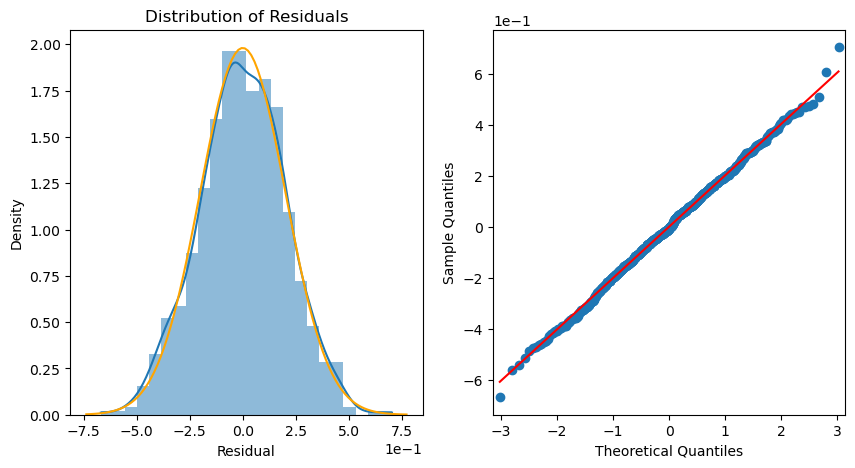

In [13]:
# Visualization of Error Normality ------------------------------------------------------------------------------------------- #
plt.clf()
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(1,2,1)
# left visualization --------------------------------------------------------------------------------------------------------- #
sns.histplot(x = est.resid, ax=ax, stat = "density", linewidth = 0, kde = True)
ax.set(title="Distribution of Residuals", xlabel="Residual")

# normalcurve, for easy comparrison ------------------------------------------------------------------------------------------ #
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

#  right visualization ------------------------------------------------------------------------------------------------------- #
ax = fig.add_subplot(1,2,2)
sm.ProbPlot(est.resid).qqplot(line='s', ax=ax)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))


plt.show()

#### Tests for Error Normality

##### Shapiro-Wilk-Test:

The Shapiro-Wilk test calculates "W" that tests wether a random sample $x_1, x_2, ..., x_n$ comes specifically from a normal distribution. The test statistic is obtained by dividing the square of an appropriate linear combination of the sample order statistics by the usual symmetric estimate of variance, optained via Monte Carlo Simulations.
"W test is comparatively quite sensitive to a wide range of non-normality, even with samples as small as n = 20. It seems to be especially sensitive to asymmetry, long-tailedness and to some degree to short-tailedness." - [2]

$W = \frac{(\displaystyle\sum_{i=1}^n a_i x_{(i)})^2}{\displaystyle\sum_{i=1}^n (x_i - \bar{x})^2}$

 - $x_{(i)}$ i-th smalles number in the sample
 - $a_i$ constant generated from the means, variances, and covariances of the order statistics of a sample of size n from a normal distribution
 
https://www.cambridge.org/core/journals/journal-of-the-institute-of-actuaries/article/abs/biometrika-tables-for-statisticians-volume-ii-edited-by-e-s-pearson-and-h-o-hartley-pp-xviii-385-published-for-the-biometrika-trustees-at-the-cambridge-university-press-1972-500/817D1F97132514B805526B9793C3B37A [1] (5 BP, or access from a university library)

http://www.bios.unc.edu/~mhudgens/bios/662/2008fall/Backup/wilkshapiro1965.pdf [2]

##### Anderson-Darling-Test:

Modified Kolmogorov-Smirnov test, that gives more weight to the tails, than the original, in addition it makes use of the specific distribution in calculation of it's critical values. It's more sensitive than the Kolmogorov-Smirnov test. Test is one-sided, rejection if A > critical value.

$A^2 = -N - S$

$S = \displaystyle\sum_{i=1}^N \frac{2i-1}{N} [ln F(Y_i) + ln (1 - F(Y_{N+1-i}))]$

 - F = cumulative distribution function
 - Y_i = ordered data

https://www.math.utah.edu/~morris/Courses/6010/p1/writeup/ks.pdf

##### Kolmogorov-Smirnov-Test:

The Kolmogorov-Smirnov test is based on the empirical distribution function (ECDF). More sensitive near the center of the distribution than tails Given N ordered data points $Y_1, Y_2, ..., Y_N$, the ECDF is defined as:

$E_N = \frac{n(i)}{N}$

$D = \max\limits_{1<=i<=N} (F(Y_i) - \frac{i-1}{N}, \frac{i}{N} - F(Y_i))$

 - N = number of ordered data points $Y_i$
 - F = continuous, fully specified thoretical cumulative distribution of the distribution being tested


In [14]:
# Tests for Error Normality -------------------------------------------------------------------------------------------------- #

# Shapiro-Wilk-Test for Normality -------------------------------------------------------------------------------------------- #
sw_stat, sw_p = stats.shapiro(est.resid)
print("# Shapiro-Wilk-Test for Normality " + "-"*(122 - len("Shapiro-Wilk-Test for Normality")) + " #")
print("Test Statistic:")
print(sw_stat)
print("P-Value:")
print(sw_p)
print("")

print("Null Hypothesis:")
print("The data was drawn from a normal distribution.")
print("Alternative Hypothesis:")
print("The data was NOT drawn from a normal distribution.")
print("")

if sw_p <= alpha:
    print("Reject the null hypothesis, in favor of the alternative hypothesis.")
else:
    print("Do not reject the null hypothesis.")
print("")

# Anderson-Darling-Test for Normality ---------------------------------------------------------------------------------------- #
def reject_null(stat, cv_arr, sl_arr, alpha):
    sl = 0
    index = 0
    sl_lst = np.ndarray.tolist(sl_arr)
    cv_lst = np.ndarray.tolist(cv_arr)
    for level in sl_lst:
        if level == alpha * 100:
            sl = level
            index = sl_lst.index(level)
    if cv_lst[index] < stat:
        return True
    else:
        return False

ad_stat, ad_cv, ad_sl = stats.anderson(est.resid)
print("# Anderson-Darling-Test for Normality " + "-"*(122 - len("Anderson-Darling-Test for Normality")) + " #")
print("Test Statistic:")
print(ad_stat)
print(f"Critical Value: {ad_cv}")
print(f"Significance Level: {ad_sl}")
print("")

print("Null Hypothesis:")
print("The sample is drawn from a population that follows a particular distribution. (Normal Distribution)")
print("Alternative Hypothesis:")
print("The sample is NOT drawn from a population that follows a particular distribution. (Normal Distribution)")
print("")

if reject_null(ad_stat, ad_cv, ad_sl, alpha):
    print("Reject the null hypothesis, in favor of the alternative hypothesis.")
else:
    print("Do not reject the null hypothesis.")
print("")

# Kolmogorov-Smirnov-Test for Normality -------------------------------------------------------------------------------------- #
ks_stat, ks_p = stats.kstest(est.resid, stats.norm.cdf)
print("# Kolmogorov-Smirnov-Test for Normality " + "-"*(122 - len("Kolmogorov-Smirnov-Test for Normality")) + " #")
print("Test Statistic:")
print(ks_stat)
print("P-Value:")
print(ks_p)
print("")

print("Null Hypothesis:")
print("The two distributions are identical, F(x)=G(x) for all x. (default: two-sided)")
print("Alternative Hypothesis:")
print("They are NOT identical.")
print("")

if ks_p <= alpha:
    print("Reject the null hypothesis, in favor of the alternative hypothesis.")
else:
    print("Do not reject the null hypothesis.")


# Shapiro-Wilk-Test for Normality ------------------------------------------------------------------------------------------- #
Test Statistic:
0.9988834857940674
P-Value:
0.9128876328468323

Null Hypothesis:
The data was drawn from a normal distribution.
Alternative Hypothesis:
The data was NOT drawn from a normal distribution.

Do not reject the null hypothesis.

# Anderson-Darling-Test for Normality --------------------------------------------------------------------------------------- #
Test Statistic:
0.2754220284720077
Critical Value: [0.573 0.653 0.783 0.913 1.087]
Significance Level: [15.  10.   5.   2.5  1. ]

Null Hypothesis:
The sample is drawn from a population that follows a particular distribution. (Normal Distribution)
Alternative Hypothesis:
The sample is NOT drawn from a population that follows a particular distribution. (Normal Distribution)

Do not reject the null hypothesis.

# Kolmogorov-Smirnov-Test for Normality ---------------------------------------------------

#### Tests for Constant Error Variance

##### Levene Test for Equal Variances:

##### Bartlett'S Test for Equal Variances:

##### Breusch-Pagan Test for Constant Error Variance:

In [15]:
# Tests for Constant Error Variance ------------------------------------------------------------------------------------------ #

# Levene Test for Equal Variances -------------------------------------------------------------------------------------------- #
sample_1 = est.resid[:79]
sample_2 = est.resid[80:]

l_stat, l_p = stats.levene(sample_1, sample_2)
print("# Levene Test for Equal Variances, significant deviations from normality" + "-"*(122 - len("Levene Test for Equal Variances, significant deviations from normality")) + " #")
print("Test Statistic:")
print(l_stat)
print("P-Value:")
print(l_p)
print("")

print("Null Hypothesis:")
print("All input samples are from populations with equal variances. (More robust with significantly non-normal populations)")
print("Alternative Hypothesis:")
print("NOT all input samples are from populations with equal variances.")
print("")

if l_p <= alpha:
    print("Reject the null hypothesis, in favor of the alternative hypothesis.")
else:
    print("Do not reject the null hypothesis.")
print("")

# Bartlett'S Test for Equal Variances ---------------------------------------------------------------------------------------- #
b_stat, b_p = stats.bartlett(sample_1, sample_2)
print("# Bartlett'S Test for Equal Variances, NO significant deviations from normality" + "-"*(122 - len("Bartlett'S Test for Equal Variances, NO significant deviations from normality")) + " #")
print("Test Statistic:")
print(b_stat)
print("P-Value:")
print(b_p)
print("")

print("Null Hypothesis:")
print("All input samples are from populations with equal variances.")
print("Alternative Hypothesis:")
print("NOT all input samples are from populations with equal variances.")
print("")

if b_p <= alpha:
    print("Reject the null hypothesis, in favor of the alternative hypothesis.")
else:
    print("Do not reject the null hypothesis.")
print("")

# Breusch-Pagan Test for Constant Error Variance ----------------------------------------------------------------------------- #
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(est.resid, est.model.exog)
print("# Breusch-Pagan Test for Constant Error Variance " + "-"*(122 - len("Breusch-Pagan Test for Constant Error Variance")) + " #")
print("Test Statistic (LM, F):")
print(f"{lm}, {fvalue}")
print("P-Value (LM, F):")
print(f"{lm_pvalue}, {f_pvalue}")
print("")

print("Null Hypothesis:")
print("The variance is constant.")
print("Alternative Hypothesis:")
print("The variance is NOT constant.")
print("")

if f_pvalue <= alpha:
    print("Reject the null hypothesis, in favor of the alternative hypothesis.")
else:
    print("Do not reject the null hypothesis.")


# Levene Test for Equal Variances, significant deviations from normality---------------------------------------------------- #
Test Statistic:
1.2203120059499477
P-Value:
0.2696328096558056

Null Hypothesis:
All input samples are from populations with equal variances. (More robust with significantly non-normal populations)
Alternative Hypothesis:
NOT all input samples are from populations with equal variances.

Do not reject the null hypothesis.

# Bartlett'S Test for Equal Variances, NO significant deviations from normality--------------------------------------------- #
Test Statistic:
0.7596621818494427
P-Value:
0.38343426264555736

Null Hypothesis:
All input samples are from populations with equal variances.
Alternative Hypothesis:
NOT all input samples are from populations with equal variances.

Do not reject the null hypothesis.

# Breusch-Pagan Test for Constant Error Variance ---------------------------------------------------------------------------- #
Test Statistic (LM, F):
2

#### Durbin Watson Test for first Order Autocorrelation

The DW-Statistic ranges from 0 to 4, with 2 meaning that the $H_0$ of no autocorrelation is correct and values smaller 2, that there is positive and values larger 2 meaning that there is negative autocorrelation.

$\hat{\epsilon_i} = y_i - \hat{y_i}$

$DW = \frac{\displaystyle\sum_{t=2}^n (\hat{\epsilon}_t - \hat{\epsilon}_{t-1})^2}{\displaystyle\sum_{t=1}^n \hat{\epsilon}_t^2}$

 - t-th period


# Durbin Watson Test for 1. Order Autocorrelation--------------------------------------------------------------------------- #
(Test Statistic should be roughly identical with Durbin-Watson Value in est.summary() printout.)
Test Statistic:
1.8916712989537217
Null Hypothesis:
There is no 1. Order Autocorrelation
Alternative Hypothesis:
There is 1. Order Autocorrelation

Reject the null hypothesis, in favor of the alternative hypothesis. There is positive autocorrelation


<Figure size 640x480 with 0 Axes>

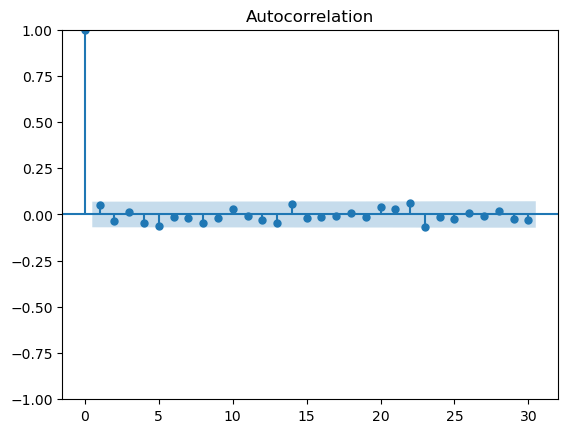

In [16]:
# Tests for Autocorrelation -------------------------------------------------------------------------------------------------- #
# Durbin Watson Test for first Order Autocorrelation ------------------------------------------------------------------------- #
dw_stat = durbin_watson(est.resid, axis=0)

print("# Durbin Watson Test for 1. Order Autocorrelation" + "-"*(122 - len("Durbin Watson Test for 1. order Autocorrelation")) + " #")
print("(Test Statistic should be roughly identical with Durbin-Watson Value in est.summary() printout.)")
print("Test Statistic:")
print(dw_stat)

print("Null Hypothesis:")
print("There is no 1. Order Autocorrelation")
print("Alternative Hypothesis:")
print("There is 1. Order Autocorrelation")
print("")

if 0 <= dw_stat <= 2:
    print("Reject the null hypothesis, in favor of the alternative hypothesis. There is positive autocorrelation")
elif 2 <= dw_stat <= 4:
    print("Reject the null hypothesis, in favor of the alternative hypothesis. There is negative autocorrelation")
elif dw_stat == 2:
    print("Do not reject the null hypothesis.")
else:
    print("Something ain't right.")

# plot of autocorrelation within the residuals ------------------------------------------------------------------------------- #
plt.clf()
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

#### Confidence Intervals

The confidence interval for $\beta_j$ is:

($\hat\beta_j$ - $t_\frac{\alpha}{2}$ $s_{\hat\beta_j}$, $\hat\beta_j$ + $t_\frac{\alpha}{2}$ $s_{\hat\beta_j}$)

where $t_\frac{\alpha}{2}$ cuts of area $\frac{\alpha}{2}$ in the tail of a t distribution with df = n - (k + 1), the error df.

With $s_\epsilon$ being the standard deviation from the regression equation and $v_jj$ is the entry in row j + 1, column j + 1 of $(X'X)^{-1}$, with X already being known, this can be solved with matrix operations.

In [17]:
# using the (statsmodels) RegressionResults method conf_int() ---------------------------------------------------------------- #
est.conf_int(alpha = alpha)

,0,1
const,-0.013579,0.014463
X_1,0.373302,0.400669
X_2,0.393598,0.420759


In [22]:
# calculating the confidence intervall manually using numpy matrix operations ------------------------------------------------ #
# our least-squares estimator ------------------------------------------------------------------------------------------------ #
beta_estimator_4dec
# the alpha for our confidence intervall ------------------------------------------------------------------------------------- #
alpha
# the standard error of our least-squares estimator -------------------------------------------------------------------------- #
s_e = np.sqrt(est.mse_resid)

# appending intercept, estimator vifs
vif_lst = list()
for i in range(len(Xc.columns)):
    vif = variance_inflation_factor(exog = Xc.values, exog_idx = i)
    vif_lst.append(vif)
    
# degrees of freedom --------------------------------------------------------------------------------------------------------- #
n = est.nobs
k = len(X_train.columns)
df = n - (k + 1)

# \bar X , mean_X_j ---------------------------------------------------------------------------------------------------------- #
X_means = np.mean(X_estimator, axis=0)

# sum squared of x_residuals ------------------------------------------------------------------------------------------------- #
x_diffs_sq = np.empty_like(X_estimator)
for i in range(len(X_estimator)):
    x_diffs_sq[i, :] = (X_estimator[i, :] - X_means)**2

S_xx = np.sum(x_diffs_sq, axis=0)

# standard error for each \hat\beta ------------------------------------------------------------------------------------------ #
'''
std_error_estimator_lst = list()
for i in range(len(beta_estimator_4dec)):
    std = s_e * np.sqrt((1 / S_xx[i]) * vif_lst[i])
    std_error_estimator_lst.append(std)
    print(std)
'''

V = np.linalg.inv(np.transpose(X_estimator) @ X_estimator)

std_error_estimator_lst = list()
for j in range(len(beta_estimator_4dec)):
    v_jj = V[j][j]
    std = s_e * np.sqrt(v_jj)
    std_error_estimator_lst.append(std)
    
# t-value from table based on alpha and df ----------------------------------------------------------------------------------- #
t_value = special.stdtrit(df, 1 - alpha)

# confidence intervals table ------------------------------------------------------------------------------------------------- #
upper_ci_lst = list()
lower_ci_lst = list()

for j in range(len(beta_estimator_4dec)):
    intervall = t_value * std_error_estimator_lst[j]
    upper = round(beta_estimator_4dec[j] + intervall, 4)
    lower = round(beta_estimator_4dec[j] - intervall, 4)
    upper_ci_lst.append(upper)
    lower_ci_lst.append(lower)
    
print(upper_ci_lst)
print(lower_ci_lst)

[0.0092, 0.3984, 0.418]
[-0.0118, 0.3778, 0.3974]


#### Hypothesis Testing

#### Prediction using the Model

#### Save the model